<h1>Project #2 TSP Genetic Algorithm</h1>
<h5>Course: CAP4630 001<h5>
<h5>Team Members: Adam Clark, Mahmood Sakib, Quang Le</h5>


<h3>Overview</h3>

<body>
The Traveling Salesman Problem (TSP) is about finding the shortest route that visits a list of cities and returns to the starting city. It's a challenging problem with no known fast solution also known as NP-hard, meaning that there is no known polynomial time solution to the problem.However, there are approximate algorithms that can find solutions close to the optimal one such as Ant Colony or Genetic Algorithm. In this project, we will be using the genetic algorithm to solve the TSP problem. The genetic algorithm is a metaheuristic(high-level problem-solving strategies that guide the exploration and exploitation of search spaces to find near-optimal solutions) inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms. The genetic algorithm repeatedly modifies a population of individual solutions. At each step, the genetic algorithm selects individuals at random from the current population to be parents and uses them to produce the children for the next generation. Over successive generations, the population "evolves" toward an optimal solution. Althought there are many variations of the genetic algorithm, they will boil down to these basic step:

1. Initialization - create an initial population
2. Selection - select parents from the population
3. Crossover - create offspring by mating parents
4. Mutation- mutate offspring
5. reapeat 2-4 until terminatal condition is met
<body>

<h3>Team Roles</h3>
<body>
<p>
<ul>

<li>Adam Clark - Reporter</li>

<li>Mahmood Sakib - Architecture</li>

<li>Quang Le - Developer</li>
</ul>
</p>
</body>

<h3>How were the cities and distances represented (as a data structure)?</h3>

<body>
<p>
 The cities are represented using a dictionary data structure where the keys represent the city numbers and the values are tuples containing the x and y coordinates of each city. This representation allows easy access to the coordinates of a city for distance calculation. Furthermore the distance are calculated using the distance formula square root of (x2-x1)^2 + (y2-y1)^2 which will be use in our fitness fuction later on.
</p>


</body>

<h3>Contribution</h3>
<ul>
<p>
Solution and Data Structure propose by Mahmood Sakib
</p>
<p>
Implementation was done by Adam Clark with the assistance of Quang Le
</p>
<ul>

In [14]:
import random
import math

#generate cities
def generate_cities (n=25, width=200, height=200):
  cities= {}
  random.seed(1) #setting the seed to 1 for reproducibility
  for i in range (n): #generating n cities
    x = random.uniform(0, width)  #random x coordinate 0-200
    y = random.uniform(0, height) #random y coordinate 0-200
    cities[i+1] = (int(x),int(y)) #adding the city to the dictionary
  return cities 

#calculate distance between two cities
def calculate_distance (cityA, cityB): 
  xDis = abs(cityA[0] - cityB[0])
  yDis = abs(cityA[1] - cityB[1])
  return (math.sqrt((xDis**2)+(yDis**2))) #distance between two points formula

<h3>How did you encode the solution space?</h3>
<body>
The solution space is encoded as permutations of the cities. Each solution in the population is represented as a list of city numbers, where the order of the numbers determines the sequence of visiting the cities.
</body>
<h3>How did you handle the creation of the initial population?</h3>
<body>
The initial population is created using the <i>create_Initial_Population</i> function. It generates a population of a specified size where each solution is a randomly generated permutation of city numbers. The <i>random.sample</i> function is used to ensure that no city is repeated within a solution.
</body>

<h3>Contribution</h3>
<ul>
<p>
Solution and algorithm propose by Mahmood Sakib
</p>
<p>
Implementation was done by Adam Clark with the assistance of Quang Le
</p>
<ul>

In [15]:
#creating the inital population for the genetic algorithm
def create_Initial_Population (size_population,size_cities):
  population = []
  random.seed() 
  for i in range (size_population): #creating a population of n solutions
      population.append(random.sample(range(1, size_cities+1), size_cities))   #creating a solution of n cities but with no duplicates
  return population

<h3>How did you compute the fitness score?</h3>
<body>
the fitness score is computed by calculating the total distance traveled in each solution. The fitness function iterates over each solution in the population. For each solution, it calculates the distance between consecutive cities using the calculate_distance function. If during the iteration get an <i>out of range</i> error it mean that we reach the last city and can calculates the distance from the last city to the inital city we started and sums them up to get the total distance if the last city. The fitness score for each solution is the sum of distances.
</body>

<h3>Contribution</h3>
<ul>
<p>
Algorithm propose by Adam Clark
</p>
<p>
Implementation was done by Quang Le
</p>
<ul>

In [16]:
#calculating the fitness of each solution
def fitness (population,cityList):
  fitness_per_solution= [] #list of fitness for per solution
  fitness = [] #list of fitness for each solution
  for i in range (len(population)): #for each solution
    for j in range (len(population[i])):  #for each city in the solution    
      try:
        fitness_per_solution.append(int(calculate_distance(cityList[population[i][j]],cityList[population[i][j+1]]))) #calculating the distance between two cities
      except IndexError:
        fitness_per_solution.append(int(calculate_distance(cityList[population[i][j]],cityList[population[i][0]]))) #calculating the distance between the last city and the first city
    fitness.append(sum(fitness_per_solution)) #summing the distance between all cities in the solution
    fitness_per_solution= [] #list of fitness for per solution
  return fitness  

<h3>Which parent selection strategy did you use? Why?</h3>


<body>
<p>
The parent selection strategy used is a simple random selection from the fittest 50% of the population. The selection function randomly selects two parents from the top 50% of solutions with the lowest fitness (shortest distances). This strategy gives a higher chance for better-performing solutions to be selected as parents, promoting the preservation of good traits in the offspring.
</p>
</body>

<h3>Contribution</h3>
<ul>
<p>
Algorithm propose by Quang Le
</p>
<p>
Implementation was done by Sakib Mahmood
</p>
<ul>

In [17]:
#Selecting two parents from the that 50% of the population that have the lowest fitness (distance)
def selection(population,fitness):
  population_fitness = {}
  for i in range (len(population)): #creating a dictionary of the population and their fitness   
    population_fitness[i] = fitness[i]
  fittest_50_percent = [] 
  for i in range (len(population)):
    if population_fitness[i] <= (sum(population_fitness.values())/len(population)): #selecting top 50% of the population
      fittest_50_percent.append(i)
    else:
      pass
  random.seed()#Reset the seeds so we dont get the same value
  parent1= random.choice(fittest_50_percent) #selecting a random parent from the 50% of the population that have the lowest fitness (distance)
  parent2= random.choice(fittest_50_percent) #selecting a random parent from the 50% of the population that have the lowest fitness (distance)
  #validating that the two parents are not the same
  while parent1 == parent2:
    parent2= random.choice(fittest_50_percent) #selecting a random parent from the 50% of the population that have the lowest fitness (distance)
    
  return parent1,parent2

<h3>Which crossover strategy(ies) did you try? Which one worked out best?</h3>

<body>
the original thought was using the single point crossover strategy in which we split the parent genes at a certain point and just do a simple swap which can work for less complex problem like the Knapsack problems or Targeted String Problem but a problem occur in which we will have repeating city in the same solution space thus skewing our fitness function additionally will break our parameter for the problem which dictate that we must travel through all cities. To address the issue of having repeated cities in the same solution space and ensure that all cities are visited, After a bit of research we found (Eric Stoltz) solution which used the Order Crossover (OX) breeding method. This method is specifically designed for permutation-based problems such as the Traveling Salesman Problem (TSP). The function performs a random crossover between two parent solutions. It starts by selecting a random range of genes (city numbers) from one parent. The selected genes are then copied to the offspring in the same positions. The remaining genes are filled in the order they appear in the second parent, while ensuring that no duplicates occur. This way, the order of cities is maintained, and all cities are still visited.

<p>
<i>
Parent 1: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Parent 2: [4, 6, 8, 9, 2, 7, 5, 1, 3]

Generate two random indices, geneA and geneB, within the length of the parent solutions. These indices determine the crossover range.

For example, let's say geneA is 3 and geneB is 7.

Determine the starting and ending points for the crossover range.

startGene is the minimum value between geneA and geneB: 3.
endGene is the maximum value between geneA and geneB: 7.
Create the child solution childP1 by copying the genes within the crossover range from Parent 1.

childP1: [4, 5, 6]
Generate the child solution childP2 by adding the genes from Parent 2 that are not already in childP1. Maintain the order of the genes from Parent 2.

childP2: [8, 9, 2, 7, 1, 3]
Note: The genes 4, 5, and 6 are not added to childP2 since they are already present in childP1.

Combine childP1 and childP2 to create the final child solution.

Child Solution: [4, 5, 6, 8, 9, 2, 7, 1, 3]
</i>
</p>
</body>



<h3>Contribution</h3>
<ul>
<p>
Solution and algorithm propose by Sakib Mahmood
</p>
<p>
Implementation was done by Adam Clark 
</p>
<ul>

In [18]:
#Order cross over breeding
def order_crossover_breed (Parent1,Parent2):
  childP1 = [] #child solution from parent 1
  childP2 = [] #child solution from parent 2
  random.seed() #Reset the seeds so we dont get the same value
  geneA = int(random.random() * len(Parent1)) #creating a random index from parent 1
  geneB = int(random.random() * len(Parent1)) #creating a random index from parent 1
  startGene = min(geneA, geneB) #selecting the least index as the starting point
  endGene = max(geneA, geneB) #selecting the highest index as the ending point
  for i in range(startGene, endGene): #for each gene in the selected range
    childP1.append(Parent1[i]) #adding the gene to the child solution from parent 1
  childP2 = [item for item in Parent2 if item not in childP1] #adding the gene to the child solution from parent 2 that are not already in the child solution from parent 1
  child = childP1 + childP2 #adding the two child solutions together
  return child

<h3>Which mutation strategy(ies) did you try? Which one worked out best?</h3>

The mutation strategy used is a simple swap mutation. The mutation function randomly selects a range of genes within a solution and swaps their positions with a certain probability (mutation rate). This introduces random changes in the solutions and helps explore different areas of the search space.


Solution 1: [1, 2, 3, 4, 5]

1.Randomly Selecting the Range of Genes: let's assume that geneA = 0 and geneB = 1. This means the selected range for mutation is from the first gene to the second gene.

2.Swapping the Genes: The genes in the selected range are swapped.
  Let's assume that randomSpot = 1 and randomSpot2 = 3. We swap the values at these positions within 
  Solution 1: [1, 4, 3, 2, 5]

3.Returning the Mutated Solution: The mutated solution is returned.
  Solution 1: [1, 4, 3, 2, 5]

<h3>Contribution</h3>
<ul>
<p>
Algorithm propose by Mahmood Sakib
</p>
<p>
Implementation was done by Quang Le
</p>
<ul>

In [19]:
def mutation(population, mutation_rate = 0.05):
  geneA = int(random.random() * len(population)) #creating a random index from parent 1
  geneB = int(random.random() * len(population)) #creating a random index from parent 2
  startGene = min(geneA, geneB) #selecting the least index as the starting point
  endGene = max(geneA, geneB) #selecting the highest index as the ending point 
  random.seed()
  if (random.random() < mutation_rate): # Only mutate if the random number is less than mutation rate
    for i in range(startGene, endGene): #for each gene in the selected range
            randomSpot = random.randint(0, len(population[i])-1)
            randomSpot2 = random.randint(0, len(population[i])-1)
            population[i][randomSpot],population[i][randomSpot2] = population[i][randomSpot2],population[i][randomSpot] #swapping the genes
  return population

<h3>Which strategy did you use for populating the next generation? Why?</h3>

<body>
<p1>
The next generation is populated by applying the parent selection, crossover, mutation is also applied but after new_population is return in evolution. The generate_new_population function selects parents, performs crossover breeding using the OX method, and produces new offspring solutions. It also applies elitism by preserving the two fittest parents from the current population in the new population. This strategy helps maintain the best solutions from the previous generation while introducing diversity through crossover and mutation. The best_fitness function is use to return the lowest distance achieve for each generation.
</p1>
</body>


<h3>Contribution</h3>
<ul>
<p>
Solution and algorithm propose by Mahmood Sakib
</p>
<p>
Implementation was done by Adam Clark with the assistance of Quang Le
</p>
<ul>

In [20]:
#create a new population of n-2 solutions by breeding the fittest 50% of the population
def generate_new_population (population,fitness,eliteSize):
  new_population = []
  for i in range (len(population)-eliteSize): #creating a new population of n-2 solutions
    parent1,parent2 = selection(population,fitness)
    new_population.append(order_crossover_breed(population[parent1],population[parent2]))
  #picking the two fittest parents and adding them to the new population (elitism)
  population_fitness = {}
  for i in range (len(population)): #creating a dictionary of the population and their fitness
    population_fitness[i] = fitness[i]
  population_fitness = sorted(population_fitness.items(), key=lambda x: x[1]) #sorting the population by fitness (distance)
  for i in range (eliteSize):
    new_population.append(population[population_fitness[i][0]]) #adding the fittest parent to the new population
  return new_population

def best_fitness(population,fitness):
  population_fitness = {}
  for i in range (len(population)): #creating a dictionary of the population and their fitness
    population_fitness[i] = fitness[i]
  population_fitness = sorted(population_fitness.items(), key=lambda x: x[1]) #sorting the population by fitness (distance)
  return population[population_fitness[0][0]],population_fitness[0][1] #returning the fittest solution and its fitness (distance)

def evolution(population,fitnessArray,mutation_rate,cityList,eliteSize):
  new_population = generate_new_population(population,fitnessArray,eliteSize)
  mutated_population = mutation(new_population,mutation_rate)
  fitnessArray = fitness(mutated_population,cityList)
  bestSolution, bestDistance = best_fitness(mutated_population, fitnessArray)
  return mutated_population, fitnessArray, bestSolution, bestDistance



<h3>Which stopping criteria did you use? Why?</h3>
<body>
<p>
The stopping criteria used is a maximum number of generations. The algorithm runs for a specified number of generations and stops when the maximum number of generations is reached or if the last 300 generation has no change. This ensures that the algorithm does not run indefinitely and that the best solution is returned after a certain number of iterations.
</p>
</body>
<h3>What other parameters, design choices, initialization and configuration steps are relevant to your design and implementation?</h3>
<body>
<ul>
  <li><code>city_list</code>: A list of city coordinates</li>
  <li><code>cities</code>: The number of cities that will be generated</li>
  <li><code>population</code>: The number of solutions in each generation</li>
  <li><code>max_generations</code>: The maximum number of generations to run the algorithm</li>
  <li><code>mutation_rate</code>: The probability of mutation</li>
  <li><code>EliteSize</code>: The number of fittest parents to preserve in the next generation</li>
</ul>
</body>

<h3>Contribution</h3>
<ul>
<p>
Algorithm propose Quang Le
</p>
<p>
Implementation was done by Adam Clark with the assistance of Sakib Mahmood
</p>
<ul>

In [21]:
if __name__ == "__main__":
  cities = 25
  population = 100
  generation  = 0
  max_generations = math.inf
  mutation_rate = 0.05
  eliteSize= 5
  cityList = generate_cities(cities)
  
  
  print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
  population = create_Initial_Population(population,cities)
  fitnessArray = fitness(population,cityList)
  bestSolution, bestDistance = best_fitness(population, fitnessArray)
  print(f"Generation 0: Best Solution: {bestSolution} Best Distance: {bestDistance}")

  last_two_hundred_distances = []
  while generation < max_generations:
      population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      print(f"Generation {generation+1}: Best Solution: {bestSolution} Best Distance: {bestDistance}")
      
      # Add the new bestDistance to the list
      last_two_hundred_distances.append(bestDistance)

      # If there are more than 300 distances in the list, remove the oldest one
      if len(last_two_hundred_distances) > 300:
          last_two_hundred_distances.pop(0)
      
      # Check if all distances in the list are the same, but only after 300 generations
      if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
          print("The best distance didn't change for the last 300 generations")
          break

      generation += 1

Cities: 25 Population: 100 Generations: inf Mutation Rate: 5.0% Elite Size= 5 



Generation 0: Best Solution: [14, 18, 7, 12, 24, 3, 9, 15, 11, 20, 2, 10, 23, 19, 21, 4, 17, 5, 13, 1, 8, 25, 16, 6, 22] Best Distance: 2127
Generation 1: Best Solution: [18, 22, 11, 8, 21, 9, 1, 17, 10, 4, 23, 12, 7, 3, 6, 24, 2, 20, 19, 15, 13, 25, 5, 14, 16] Best Distance: 2008
Generation 2: Best Solution: [18, 22, 11, 8, 21, 9, 1, 17, 10, 4, 23, 12, 7, 3, 6, 24, 2, 20, 19, 15, 13, 25, 5, 14, 16] Best Distance: 2008
Generation 3: Best Solution: [18, 22, 11, 8, 21, 9, 1, 17, 10, 4, 23, 12, 7, 3, 6, 24, 2, 20, 19, 15, 13, 25, 5, 14, 16] Best Distance: 2008
Generation 4: Best Solution: [6, 24, 2, 20, 19, 15, 13, 18, 22, 11, 8, 5, 14, 17, 9, 1, 12, 25, 16, 3, 4, 23, 21, 7, 10] Best Distance: 1877
Generation 5: Best Solution: [21, 9, 1, 17, 10, 4, 19, 25, 23, 12, 6, 20, 24, 2, 7, 13, 22, 5, 16, 18, 15, 11, 14, 3, 8] Best Distance: 1853
Generation 6: Best Solution: [20, 19, 7, 6, 23, 13, 22, 5, 16, 18, 15, 8

<h3>Which (simple) experiments have you run to observe the impact of different design decisions and
parameter values? Post their results and your comments</h3>


<b>Brute Force:</b>

Brute Force method evaluates all possible permutations of the cities to find the shortest route. It's very accurate but not efficient, as the time complexity increases factorially with the number of cities.

For a small number of cities (like 5), it should solve the problem quickly and find the exact solution.
For a higher number of cities (like 10), the time taken should increase exponentially, and might become impractical.

<b>Genetic Algorithm(GA):</b>

For a small number of cities (like 5), GA might solve the problem slightly slower than the brute force method due to the overhead of the genetic operations.
For a higher number of cities (like 10), it should solve the problem significantly faster than brute force, even if the solution is not always perfect.
Based on these expectations, the experiment will clearly demonstrate the trade-off between accuracy and efficiency when solving TSP using different methods, and how this trade-off becomes more pronounced as the problem size (number of cities) increases.


<b>Impact</b>

originally we wanted to have a hardcoded set of mutation rate, population, cities, and max_generation but we decided to make changable parameter:
  <uL>
  <li>Varying the mutation rate allowed us to study its impact on the solution's quality and the algorithm's convergence speed.</li>
  
  <li>Adjusting the population size permitted us to examine its influence on the diversity of solutions and overall search space coverage.</li>
  
  <li>Modifying the number of cities provided insights into the algorithm's scalability and efficiency.</li>
  
  <li>Finally, altering the maximum number of generations helped us understand the trade-off between computation time and solution quality.</li>
  <ul>


In [29]:
import itertools
import time


# generating all possible permutations of the cities
def generate_all_routes(cityList):
    return list(itertools.permutations(cityList))

# calculating the total distance of a route
def calculate_total_distance(route, city_positions):
    total_distance = 0
    for i in range(len(route)-1):
        total_distance += int(calculate_distance(city_positions[route[i]], city_positions[route[i+1]]))
    total_distance += int(calculate_distance(city_positions[route[-1]], city_positions[route[0]])) #back to start
    return total_distance

import math

if __name__ == "__main__":
    cityList = generate_cities(5) # 5 cities
    start_time = time.time() # record start time
    all_routes = generate_all_routes(list(cityList.keys()))
    best_route = None
    best_distance = math.inf # set initial best_distance to infinity
    for route in all_routes:
        total_distance = calculate_total_distance(route, cityList)
        if total_distance < best_distance: # if the total distance is less than the best distance
            best_route = route
            best_distance = total_distance
    end_time = time.time() # record end time
    print(f"5 cities: Best solution: {best_route} Best Distance: {best_distance}. Time taken: {(end_time-start_time)*1000}ms")

    cityList = generate_cities(10) # 10 cities
    start_time = time.time() # record start time
    all_routes = generate_all_routes(list(cityList.keys()))
    best_route = None
    best_distance = math.inf # set initial best_distance to infinity
    for route in all_routes:
        total_distance = calculate_total_distance(route, cityList)
        if total_distance < best_distance: # if the total distance is less than the best distance
            best_route = route
            best_distance = total_distance
    end_time = time.time() # record end time
    print(f"10 cities: Best solution: {best_route} Best Distance: {best_distance}. Time taken: {(end_time-start_time)*1000}ms")
    
    cities = 10
    population = 50
    generation  = 0
    max_generations = 100
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)
    
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    start_time = time.time() # record start time for genetic algorithm
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)

        generation += 1

    end_time = time.time() # record end time for genetic algorithm
    print(f"Genetic algorithm for 10 cities : Best Solution: {bestSolution} Best Distance: {bestDistance}. Time taken: {(end_time-start_time)*1000}ms")


5 cities: Best solution: (1, 4, 3, 2, 5) Best Distance: 548. Time taken: 88.99879455566406ms
10 cities: Best solution: (1, 8, 3, 5, 7, 10, 2, 6, 4, 9) Best Distance: 688. Time taken: 26806.521892547607ms
Genetic algorithm for 10 cities : Best Solution: [7, 5, 3, 8, 1, 9, 4, 6, 2, 10] Best Distance: 688. Time taken: 202.00228691101074ms


<h3>Five Run Results</h3>

Cities: 25 Population: 100 Generations: inf Mutation Rate: 5.0% Elite Size= 5 





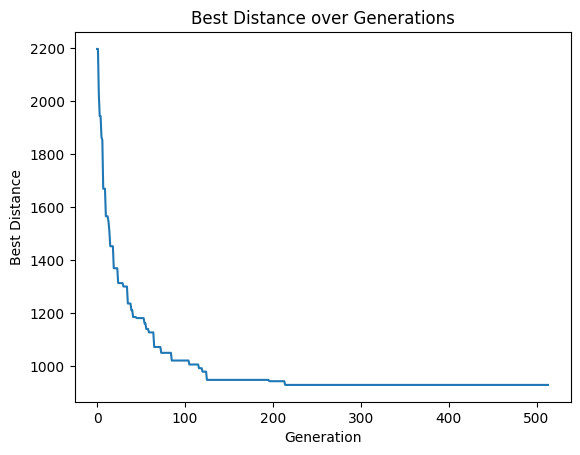

In [24]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    cities = 25
    population = 100
    generation  = 0
    max_generations = math.inf
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)
    
    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    # Create a list to store the best distances for each generation
    bestDistances = [bestDistance]

    last_two_hundred_distances = []
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      
        
        # Add the new bestDistance to the list
        last_two_hundred_distances.append(bestDistance)
        bestDistances.append(bestDistance)

        # If there are more than 300 distances in the list, remove the oldest one
        if len(last_two_hundred_distances) > 300:
            last_two_hundred_distances.pop(0)
        
        # Check if all distances in the list are the same, but only after 300 generations
        if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
            break

        generation += 1

    # Plotting the best distances
    plt.plot(bestDistances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Best Distance over Generations')
    plt.show()

Cities: 25 Population: 100 Generations: inf Mutation Rate: 50.0% Elite Size= 5 





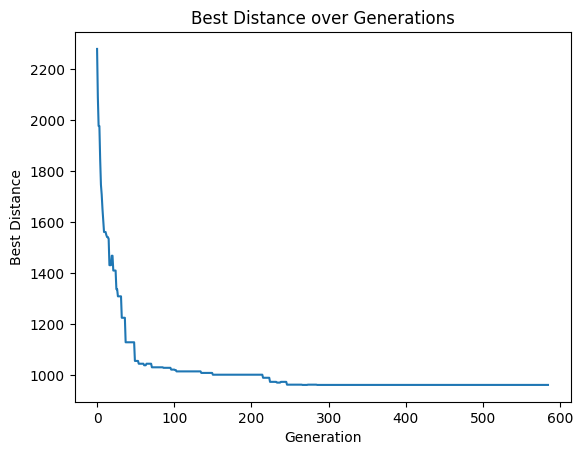

In [25]:


if __name__ == "__main__":
    cities = 25
    population = 100
    generation  = 0
    max_generations = math.inf
    mutation_rate = 0.50
    eliteSize= 5
    cityList = generate_cities(cities)
    
    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    # Create a list to store the best distances for each generation
    bestDistances = [bestDistance]

    last_two_hundred_distances = []
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      
        
        # Add the new bestDistance to the list
        last_two_hundred_distances.append(bestDistance)
        bestDistances.append(bestDistance)

        # If there are more than 300 distances in the list, remove the oldest one
        if len(last_two_hundred_distances) > 300:
            last_two_hundred_distances.pop(0)
        
        # Check if all distances in the list are the same, but only after 300 generations
        if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
            break

        generation += 1

    # Plotting the best distances
    plt.plot(bestDistances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Best Distance over Generations')
    plt.show()

Cities: 25 Population: 200 Generations: inf Mutation Rate: 5.0% Elite Size= 5 





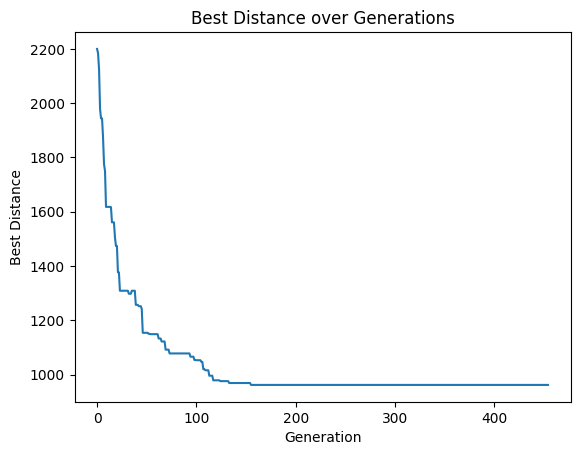

In [26]:


if __name__ == "__main__":
    cities = 25
    population = 200
    generation  = 0
    max_generations = math.inf
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)
    
    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    # Create a list to store the best distances for each generation
    bestDistances = [bestDistance]

    last_two_hundred_distances = []
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      
        
        # Add the new bestDistance to the list
        last_two_hundred_distances.append(bestDistance)
        bestDistances.append(bestDistance)

        # If there are more than 300 distances in the list, remove the oldest one
        if len(last_two_hundred_distances) > 300:
            last_two_hundred_distances.pop(0)
        
        # Check if all distances in the list are the same, but only after 300 generations
        if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
            break

        generation += 1

    # Plotting the best distances
    plt.plot(bestDistances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Best Distance over Generations')
    plt.show()

Cities: 25 Population: 200 Generations: inf Mutation Rate: 5.0% Elite Size= 5 





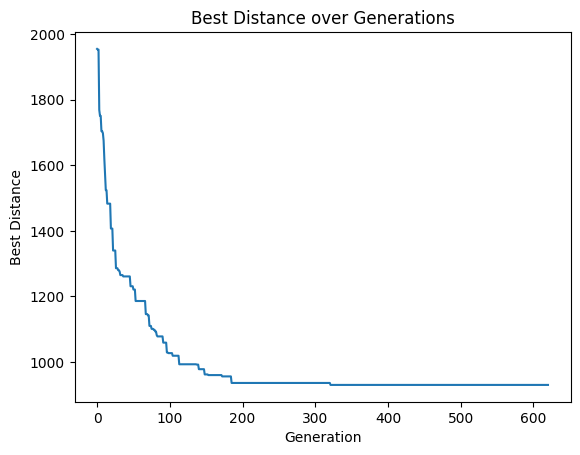

In [27]:


if __name__ == "__main__":
    cities = 25
    population = 200
    generation  = 0
    max_generations = math.inf
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)
    
    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    # Create a list to store the best distances for each generation
    bestDistances = [bestDistance]

    last_two_hundred_distances = []
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      
        
        # Add the new bestDistance to the list
        last_two_hundred_distances.append(bestDistance)
        bestDistances.append(bestDistance)

        # If there are more than 300 distances in the list, remove the oldest one
        if len(last_two_hundred_distances) > 300:
            last_two_hundred_distances.pop(0)
        
        # Check if all distances in the list are the same, but only after 300 generations
        if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
            break

        generation += 1

    # Plotting the best distances
    plt.plot(bestDistances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Best Distance over Generations')
    plt.show()

Cities: 50 Population: 200 Generations: inf Mutation Rate: 5.0% Elite Size= 5 





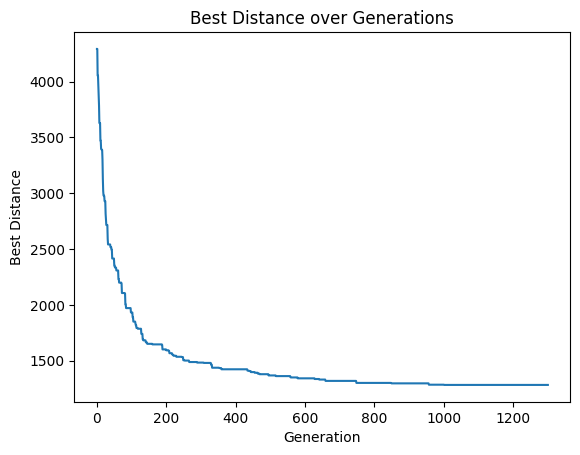

In [28]:


if __name__ == "__main__":
    cities = 50
    population = 200
    generation  = 0
    max_generations = math.inf
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)
    
    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")
    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)
    bestSolution, bestDistance = best_fitness(population, fitnessArray)

    # Create a list to store the best distances for each generation
    bestDistances = [bestDistance]

    last_two_hundred_distances = []
    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
      
        
        # Add the new bestDistance to the list
        last_two_hundred_distances.append(bestDistance)
        bestDistances.append(bestDistance)

        # If there are more than 300 distances in the list, remove the oldest one
        if len(last_two_hundred_distances) > 300:
            last_two_hundred_distances.pop(0)
        
        # Check if all distances in the list are the same, but only after 300 generations
        if generation >= 300 and len(set(last_two_hundred_distances)) == 1:
            break

        generation += 1

    # Plotting the best distances
    plt.plot(bestDistances)
    plt.xlabel('Generation')
    plt.ylabel('Best Distance')
    plt.title('Best Distance over Generations')
    plt.show()

In [46]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


if __name__ == "__main__":
    cities = 25
    population = 100
    generation  = 0
    max_generations = 500
    mutation_rate = 0.05
    eliteSize= 5
    cityList = generate_cities(cities)

    print(f"Cities: {cities} Population: {population} Generations: {max_generations} Mutation Rate: {mutation_rate*100}% Elite Size= {eliteSize} \n\n\n")

    population = create_Initial_Population(population,cities)
    fitnessArray = fitness(population,cityList)

    bestSolution, bestDistance = best_fitness(population, fitnessArray)
    print(f"Generation 0: Best Solution: {bestSolution} Best Distance: {bestDistance}")
    
    city_positions = [coord for coord in cityList.values()]  # Assume each value in cityList is a tuple representing the position of the city
    bestSolutions = [bestSolution]  # store the best solution for each generation

    while generation < max_generations:
        population, fitnessArray, bestSolution, bestDistance = evolution(population, fitnessArray, mutation_rate,cityList,eliteSize)
        bestSolutions.append(bestSolution)  # append the current best solution


        generation += 1

    # Function to update the plot for each generation
    def update(i):
        plt.cla()  # Clear the current axes.
        plt.xlim(-200,200)
        plt.ylim(-200,200)
        route = bestSolutions[i]
        for i in range(len(route)-1):
            plt.plot(*zip(city_positions[route[i]-1], city_positions[route[i+1]-1]), 'b-')
        plt.plot(*zip(city_positions[route[-1]-1], city_positions[route[0]-1]), 'b-')  # back to start
        plt.scatter(*zip(*city_positions), color='red')  # plot the cities
        plt.title(f"Generation {i}")

    # Creating the animation
    fig = plt.figure(figsize=(10, 10))
    ani = FuncAnimation(fig, update, frames=range(len(bestSolutions)), repeat=False)

    plt.show()


Cities: 25 Population: 100 Generations: 500 Mutation Rate: 5.0% Elite Size= 5 



Generation 0: Best Solution: [10, 25, 8, 7, 2, 17, 18, 5, 16, 6, 14, 3, 24, 19, 1, 22, 13, 9, 4, 21, 23, 15, 11, 20, 12] Best Distance: 2265


<IPython.core.display.Javascript object>

<h3>Refrences</h3>


OOP solution (in Python) by Eric Stoltz: https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35